In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib notebook

In [21]:
NW = (-70.14655, 43.72273)
NE = (-70.14619, 43.72253)
SE = (-70.14876, 43.72015)
SW = (-70.14911, 43.72035)
corners = [NW, NE, SE, SW]

In [74]:
df = pd.read_html('https://tidesandcurrents.noaa.gov/noaacurrents/Stations?g=454')[0]
df = df.dropna().drop_duplicates(subset=['LAT', 'LON']).reset_index(drop=True)

# cleans data
df['ID'] = df['ID'].apply(lambda x: x[:7])
df['LON'] = df['LON'].apply(lambda x: '-' + x[:-3]).astype(float)
df['LAT'] = df['LAT'].apply(lambda x: x[:-3]).astype(float)

df = df[df['ID'].str.contains('CAB')].reset_index(drop=True)

In [108]:
df.tail()

,NAME,ID,LAT,LON,PREDICTIONS
17,"Portland Breakwater Light, 0.3 n.mi east of (D...",CAB1403,43.6553,-70.2278,Harmonic
18,Diamond Island Roads (Depth 7ft),CAB1404,43.6625,-70.2157,Harmonic
19,Ocean Gate Terminal (Depth 3ft),CAB1405,43.6610,-70.2400,Harmonic
20,"State Pier, Portland Harbor (Depth 3ft)",CAB1406,43.6547,-70.2450,Harmonic
21,"Fore River, Portland River Bridge (Depth 5ft)",CAB1407,43.6458,-70.2573,Harmonic


<IPython.core.display.Javascript object>


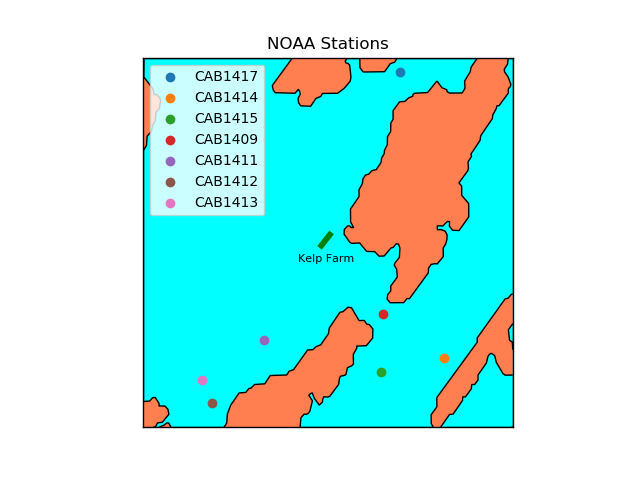

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [153]:
from mpl_toolkits.basemap import Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.


fig_width = 8000

fig, ax = plt.subplots()
m = Basemap(projection='lcc', width=fig_width, height=fig_width, lon_0=-70.147, lat_0=43.721, resolution='f')
# m = Basemap(projection='merc', lon_0=-70.147, lat_0=43.721, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# adds location of farm
poly = Polygon([m(*c) for c in corners],facecolor='green',edgecolor='green',linewidth=3, zorder=10)
ax.add_patch(poly)

ax.annotate('Kelp Farm',
            xy=(0.5, 0.5), xycoords='axes fraction',
            xytext=(-30, -20), textcoords='offset pixels', 
            fontsize=8)

# adds station locations
for ID, lat, lon in df[['ID', 'LAT', 'LON']].values:
    
    x, y = m(lon, lat)
    if x > 0 and x < fig_width and y > 0 and y < fig_width:    
        a = m.scatter(lon, lat,
                      latlon=True,
                      marker='o',
                      zorder=10,
                      label=ID)

ax.set_title("NOAA Stations")
ax.legend()

<IPython.core.display.Javascript object>


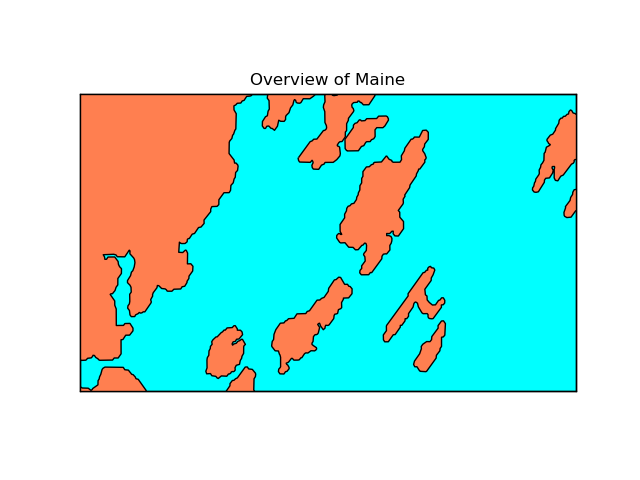

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'Overview of Maine')

In [2]:
from mpl_toolkits.basemap import Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
plt.figure()
m = Basemap(projection='lcc', width=20000, height=20000, lon_0=-70.147, lat_0=43.721, resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
plt.title("Overview of Maine")

<IPython.core.display.Javascript object>


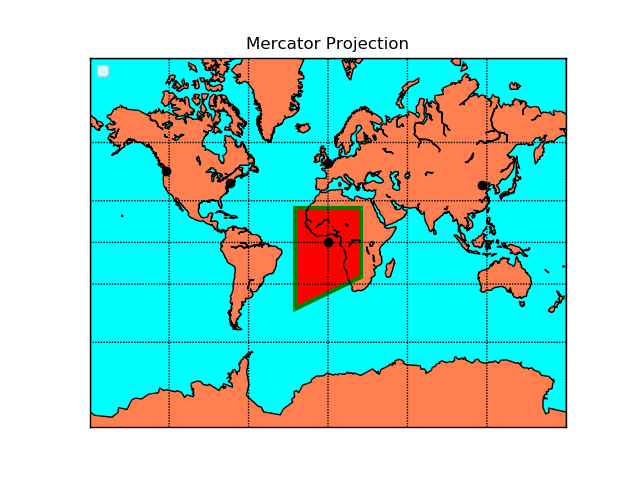

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
No handles with labels found to put in legend.


In [87]:
plt.figure()


# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
m.scatter([-73.98, 238., 0.08, 0., 116.38],[40.78,47.6,  51.53,0., 39.91],
          latlon=True, # Ta-da!
          marker='o',color='k',
          zorder=10)

x1,y1 = m(-25,-45)
x2,y2 = m(-25,25)
x3,y3 = m(25,25)
x4,y4 = m(25,-25)

poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='red',edgecolor='green',linewidth=3)
plt.gca().add_patch(poly)
plt.legend()